### Kielder data summaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math

In [2]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

# Assume want both species of tick, only SA species of verterbrate
# Assume both tick sp are competent vectors for disease in question
# Therefore, one set of analyses per disease, both ticks for SV

df_SA_ricinus_trianguliceps = df[df["Species"] == "SA"]

# First, want to see coincident coaggregation

month = df_SA_ricinus_trianguliceps["Month"]
month_number = []
month_short = []
for one_month in month:
    month_number.append(datetime.strptime(one_month, "%B").strftime('%m'))
    month_short.append(datetime.strptime(one_month, "%B").strftime('%b'))

df_SA_ricinus_trianguliceps.loc[:,"month_number"] = month_number
df_SA_ricinus_trianguliceps.loc[:,"month_short"] = month_short

df_SA_ricinus_trianguliceps_summary = pd.pivot_table(df_SA_ricinus_trianguliceps,
                                                            index=["Year", "month_number", "month_short"],
                                                            #index=["Year", "Month"],
                                                            values=["Larvae", "Nymphs"],
                                                            aggfunc="sum").reset_index()


/tmp/ipykernel_221059/3727485556.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SA_ricinus_trianguliceps.loc[:,"month_number"] = month_number
/tmp/ipykernel_221059/3727485556.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SA_ricinus_trianguliceps.loc[:,"month_short"] = month_short


### Seasonal distributions of larvae and nymphs, both tick species

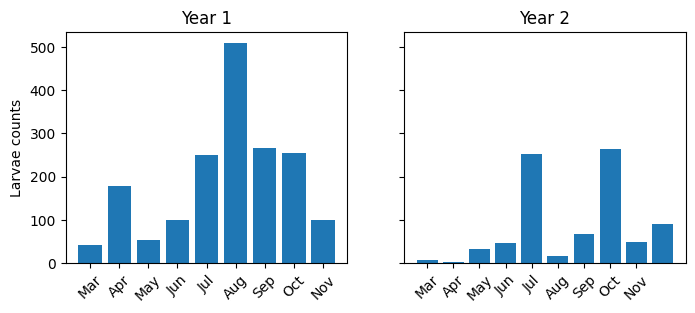

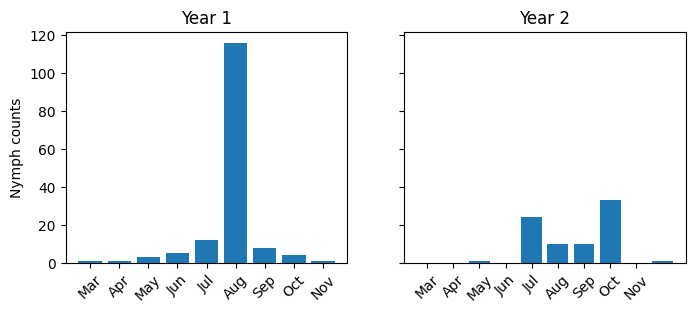

In [3]:
year_1 = df_SA_ricinus_trianguliceps_summary[df_SA_ricinus_trianguliceps_summary["Year"] == 1]
year_2 = df_SA_ricinus_trianguliceps_summary[df_SA_ricinus_trianguliceps_summary["Year"] == 2]

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)
axs[0].bar(year_1["month_short"], year_1["Larvae"])
axs[0].set_ylabel("Larvae counts")
axs[0].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[0].set_title("Year 1")
axs[1].bar(year_2["month_short"], year_2["Larvae"])
axs[1].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[1].set_title("Year 2")
plt.show()

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)
axs[0].bar(year_1["month_short"], year_1["Nymphs"])
axs[0].set_ylabel("Nymph counts")
axs[0].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[0].set_title("Year 1")
axs[1].bar(year_2["month_short"], year_2["Nymphs"])
axs[1].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=45, ha='center')
axs[1].set_title("Year 2")
plt.show()

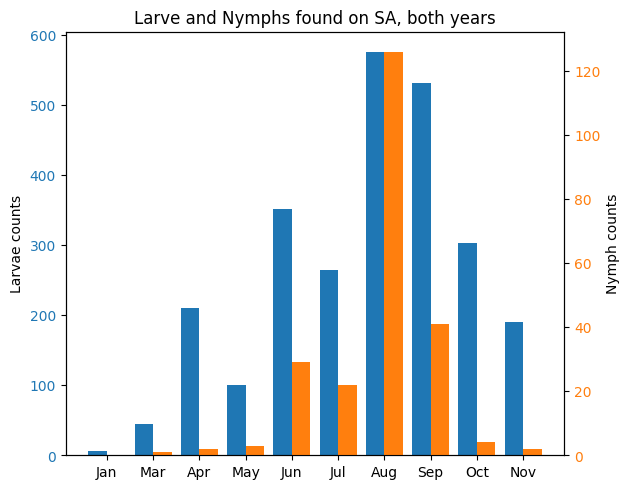

In [4]:
df_SA_ricinus_trianguliceps_summary = pd.pivot_table(df_SA_ricinus_trianguliceps,
                                                            index=["month_number", "month_short"],
                                                            values=["Larvae", "Nymphs"],
                                                            aggfunc="sum").reset_index()

width=0.4

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x=np.arange(len(df_SA_ricinus_trianguliceps_summary["month_short"]))

ax1.bar(x-width/2,
        df_SA_ricinus_trianguliceps_summary["Larvae"],
        width=width,
        color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylabel("Larvae counts")
ax1.set_xticks(x, df_SA_ricinus_trianguliceps_summary["month_short"])

ax2.bar(x+width/2,
        df_SA_ricinus_trianguliceps_summary["Nymphs"],
        width=width,
        color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_ylabel("Nymph counts")

fig.tight_layout()
plt.title("Larve and Nymphs found on SA, both years")
plt.show()

### Seasonal distribution of larvae and nymphs, per tick species

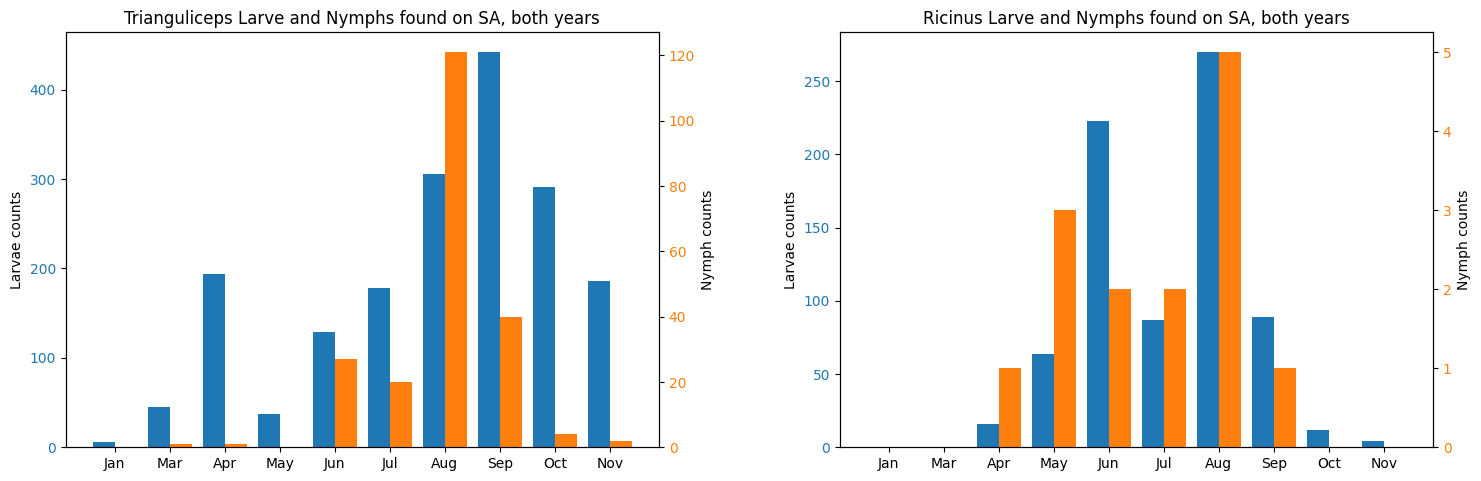

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=False)
bar_width=0.4

# Trianguliceps chart

df_SA_trianguliceps_summary = pd.pivot_table(df_SA_ricinus_trianguliceps,
                                             index=["month_number", "month_short"],
                                             values=["triangulicepsL", "triangulicepsN"],
                                             aggfunc="sum").reset_index()

second_x_axs0 = axs[0].twinx()

x=np.arange(len(df_SA_trianguliceps_summary["month_short"]))

axs[0].bar(x-width/2,
           df_SA_trianguliceps_summary["triangulicepsL"],
           width=bar_width,
           color='tab:blue')
axs[0].tick_params(axis='y', labelcolor='tab:blue')
axs[0].set_ylabel("Larvae counts")
axs[0].set_xticks(x, df_SA_trianguliceps_summary["month_short"])

second_x_axs0.bar(x+width/2,
               df_SA_trianguliceps_summary["triangulicepsN"],
               width=bar_width,
               color='tab:orange')
second_x_axs0.tick_params(axis='y', labelcolor='tab:orange')
second_x_axs0.set_ylabel("Nymph counts")

axs[0].set_title("Trianguliceps Larve and Nymphs found on SA, both years")

# Ricinis chart

df_SA_ricinus_summary = pd.pivot_table(df_SA_ricinus_trianguliceps,
                                       index=["month_number", "month_short"],
                                       values=["ricinusL", "ricinusN"],
                                       aggfunc="sum").reset_index()

second_x_axs1 = axs[1].twinx()

x=np.arange(len(df_SA_ricinus_summary["month_short"]))

axs[1].bar(x-width/2,
           df_SA_ricinus_summary["ricinusL"],
           width=bar_width,
           color='tab:blue')
axs[1].tick_params(axis='y', labelcolor='tab:blue')
axs[1].set_ylabel("Larvae counts")
axs[1].set_xticks(x, df_SA_ricinus_summary["month_short"])

second_x_axs1.bar(x+width/2,
               df_SA_ricinus_summary["ricinusN"],
               width=bar_width,
               color='tab:orange')
second_x_axs1.tick_params(axis='y', labelcolor='tab:orange')
second_x_axs1.set_ylabel("Nymph counts")

fig.tight_layout(pad=5.0)
axs[1].set_title("Ricinus Larve and Nymphs found on SA, both years")
plt.show()

# Caption should say something about seasonal tick distributions

### Summary statistics, both tick species and per tick species

In [6]:
# Check that each observation has a different ID, CHECK THAT VERTEBRATES ARE CHIPPED AND ONLY SURVEYED ONCE EACH

ID = df_SA_ricinus_trianguliceps["ID"]
ID_unique = set(ID)
assert(len(ID) == len(ID_unique))

In [7]:
# Most vertebrates don't have any ticks
larvae_aggregated = df_SA_ricinus_trianguliceps[df_SA_ricinus_trianguliceps["Larvae"] > 0]
nymphs_aggregated = df_SA_ricinus_trianguliceps[df_SA_ricinus_trianguliceps["Nymphs"] > 0]
larvae_nymphs_coaggregated = larvae_aggregated[larvae_aggregated["Nymphs"] > 0]
SA_with_larvae_and_or_nymphs = df_SA_ricinus_trianguliceps.loc[(df_SA_ricinus_trianguliceps["Larvae"] > 0) | (df_SA_ricinus_trianguliceps["Nymphs"] > 0)]

print("Number of SA with some larval burden :", len(larvae_aggregated))
print("Number of SA with some nymphal burden :", len(nymphs_aggregated))
print("Number of SA with some co-aggregation :", len(larvae_nymphs_coaggregated))
print("Number of SA with larvae and or nymph burden :", len(SA_with_larvae_and_or_nymphs))

print("Proportion of SA with some larval burden: ", len(larvae_aggregated)/len(ID))
print("Proportion of SA with some nymphal burden: ", len(nymphs_aggregated)/len(ID))
print("Proportion of SA with some co-aggregation burden: ", len(larvae_nymphs_coaggregated)/len(ID))
print("Proportion of SA with some larvae and/or nymph burden: ", len(SA_with_larvae_and_or_nymphs)/len(ID))
print("Proportion of ticky SA that have some co-aggragation burden: ", len(larvae_nymphs_coaggregated)/len(SA_with_larvae_and_or_nymphs))

# TODO: DO AGAIN FOR EACH TICK SPECIES

# TODO: FIND YEAR, COMBINATION OF TICK SPECIES AND HOST SPECIES THAT HAVE HIGHEST NUMBERS OF LARVAE AND NYMPH BURDENS, AND COAGGREGATION


Number of SA with some larval burden : 420
Number of SA with some nymphal burden : 113
Number of SA with some co-aggregation : 93
Number of SA with larvae and or nymph burden : 440
Proportion of SA with some larval burden:  0.4794520547945205
Proportion of SA with some nymphal burden:  0.12899543378995434
Proportion of SA with some co-aggregation burden:  0.10616438356164383
Proportion of SA with some larvae and/or nymph burden:  0.502283105022831
Proportion of ticky SA that have some co-aggragation burden:  0.21136363636363636


In [8]:
larvae_nymphs_coaggregated.loc[:,"coaggregation_burden"] = larvae_nymphs_coaggregated["Larvae"] + larvae_nymphs_coaggregated["Nymphs"]

/tmp/ipykernel_221059/4246622679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  larvae_nymphs_coaggregated.loc[:,"coaggregation_burden"] = larvae_nymphs_coaggregated["Larvae"] + larvae_nymphs_coaggregated["Nymphs"]


### Aggregation and co-aggregation

'\nx=np.arange(max(larvae_nymphs_coaggregated["coaggregation_burden"]))[2::4]\ntick_width = 4 # Tick in terms of x axis, not the animal!\ndomain_min = min(larvae_nymphs_coaggregated["coaggregation_burden"])\ndomain_max = max(larvae_nymphs_coaggregated["coaggregation_burden"])\ntick_count = math.ceil((domain_max-domain_min)/tick_width)*tick_width\nticks = np.linspace(domain_min, domain_max, tick_count+1)[::4]\n\naxs[2].set_xlim([2, domain_max])\naxs[2].set_xticks(x,ticks)\n'

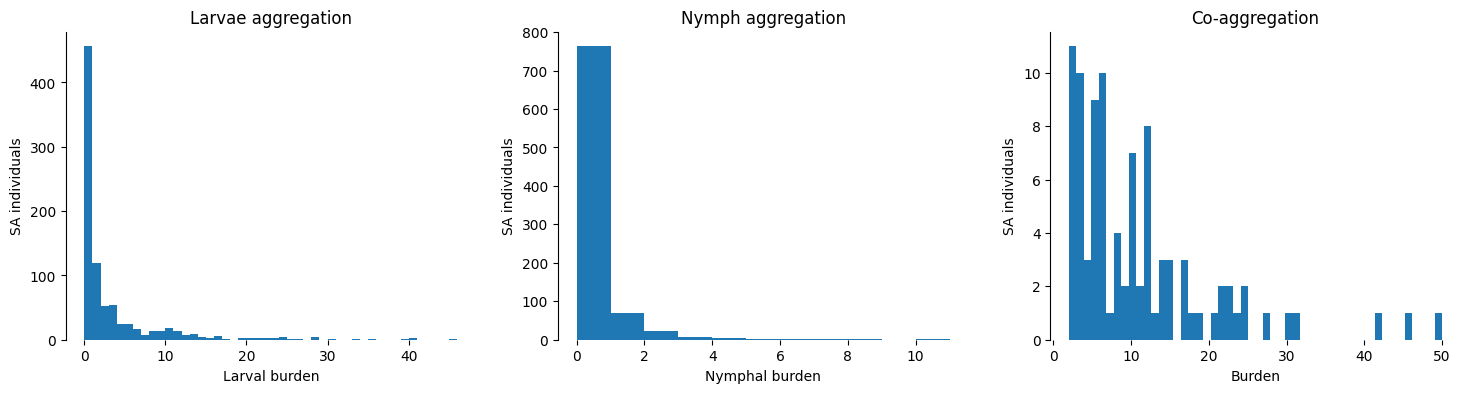

In [9]:
_, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), sharey=False)

axs[0].hist(df_SA_ricinus_trianguliceps["Larvae"], bins=max(df_SA_ricinus_trianguliceps["Larvae"]))
axs[0].set_title("Larvae aggregation")
axs[0].set_xlabel("Larval burden")
axs[0].set_ylabel("SA individuals")
axs[0].spines[['right', 'top', 'bottom']].set_visible(False)

axs[1].hist(df_SA_ricinus_trianguliceps["Nymphs"], bins=max(df_SA_ricinus_trianguliceps["Nymphs"]))
axs[1].set_title("Nymph aggregation")
axs[1].set_xlabel("Nymphal burden")
axs[1].set_ylabel("SA individuals")
axs[1].spines[['right', 'top', 'bottom']].set_visible(False)

axs[2].hist(larvae_nymphs_coaggregated["coaggregation_burden"], bins=max(larvae_nymphs_coaggregated["coaggregation_burden"]))
axs[2].set_title("Co-aggregation")
axs[2].set_xlabel("Burden")
axs[2].set_ylabel("SA individuals")
axs[2].spines[['right', 'top', 'bottom']].set_visible(False)

# TODO: BETTER TICK PLOTTING
"""
x=np.arange(max(larvae_nymphs_coaggregated["coaggregation_burden"]))[2::4]
tick_width = 4 # Tick in terms of x axis, not the animal!
domain_min = min(larvae_nymphs_coaggregated["coaggregation_burden"])
domain_max = max(larvae_nymphs_coaggregated["coaggregation_burden"])
tick_count = math.ceil((domain_max-domain_min)/tick_width)*tick_width
ticks = np.linspace(domain_min, domain_max, tick_count+1)[::4]

axs[2].set_xlim([2, domain_max])
axs[2].set_xticks(x,ticks)
"""


### 80:20 rule

Data is known to follow the 80:20 rule if the Pareto distribution fits the data with $ \alpha \sim 1.16 $. Find a citation for that fact.

Then we can take various sub-samples of the data and use that to find different shape estimates for different Pareto distributions.



In [63]:
from scipy.stats import pareto

# df_SA_ricinus_trianguliceps

# df_SA_ricinus_trianguliceps["Larvae"]
# df_SA_ricinus_trianguliceps["Nymphs"]

def get_pc_ticks_on_20_pc_vertebrates(ticks_on_vertebrates):
    number_of_vertebrates = len(ticks_on_vertebrates)
    vertebrate_20pc_number = round(number_of_vertebrates*0.2)
    
    total_ticks_sorted = sorted(ticks_on_vertebrates)
    total_ticks_sorted.reverse()

    number_of_ticks = sum(ticks_on_vertebrates)
    
    ticks_on_20_pc = 0
    for i in range(vertebrate_20pc_number):
        ticks_on_20_pc += total_ticks_sorted[i]

    return ticks_on_20_pc/number_of_ticks

total_ticks = df_SA_ricinus_trianguliceps["Larvae"] + df_SA_ricinus_trianguliceps["Nymphs"]
print(pareto.fit(total_ticks))
print(get_pc_ticks_on_20_pc_vertebrates(df_SA_ricinus_trianguliceps["Larvae"]))
print(get_pc_ticks_on_20_pc_vertebrates(df_SA_ricinus_trianguliceps["Nymphs"]))

print(get_pc_ticks_on_20_pc_vertebrates(df_SA_ricinus_trianguliceps["triangulicepsL"]))
print(get_pc_ticks_on_20_pc_vertebrates(df_SA_ricinus_trianguliceps["triangulicepsN"]))

print(get_pc_ticks_on_20_pc_vertebrates(df_SA_ricinus_trianguliceps["ricinusL"]))
print(get_pc_ticks_on_20_pc_vertebrates(df_SA_ricinus_trianguliceps["ricinusN"]))


# df_SA_ricinus_trianguliceps["triangulicepsL"]
# df_SA_ricinus_trianguliceps["triangulicepsN"]
# df_SA_ricinus_trianguliceps["ricinusL"]
# df_SA_ricinus_trianguliceps["ricinusN"]

(np.float64(83712875.0687434), np.float64(-268435456.0), np.float64(268435455.99999997))
0.8204730515703761
1.0
0.902425578831312
1.0
0.9359477124183007
1.0


In [31]:
total_ticks

39      10
40       1
41       0
42       0
43       0
        ..
3719     0
3720     0
3829     0
3830     0
3831     0
Length: 876, dtype: int64

In [ ]:
# Of SA that have Larvae and/or Nymphs on them, how many have ticks that coaggregate, as a proportion of all ticky SA

# TODO: FOLLOW THE NYMPHS: IF THERE ARE 7 NYMPHS AND 4 LARVAE, THEN THERE ARE 7*4 CHANCES FOR OFFSPRING TO OCCUR... MODEL THIS AND OFFSPRING AS BASED ON SYSTEMIC INFECTION OF LARVAE

